In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as req
import os
from sklearn import linear_model, model_selection, preprocessing
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv("melb_data.csv")
print("Number of Observations in the Dataset:  ", len(data.index))
data.head()

Number of Observations in the Dataset:   13580


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
data = data.loc[data['Method'] == 'S']
data = data[['Price','Rooms','Bathroom','Regionname','Distance','Propertycount','Landsize','BuildingArea','CouncilArea']]
data = data.dropna()
print("Number of Observations in the Dataset:  ", len(data.index))


Number of Observations in the Dataset:   4116


Text(0, 0.5, 'Count')

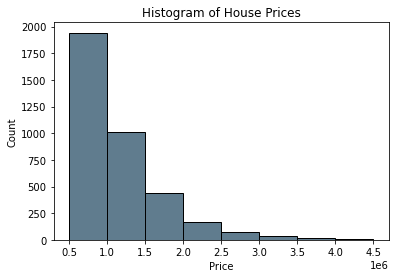

In [4]:
data["Price"].plot.hist(grid=False, bins=[0.5e6, 1e6, 1.5e6, 2e6, 2.5e6, 3e6, 3.5e6, 4e6, 4.5e6],
                   color='#607c8e', edgecolor="black")
plt.title('Histogram of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
#plt.grid(axis='y', alpha=0.75)


Text(0, 0.5, 'Count')

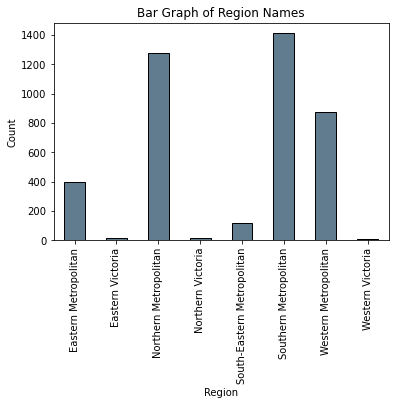

In [5]:
#data["Regionname"].plot.bar(color='#607c8e')


pl = data.groupby(['Regionname']).size()
pl.plot.bar(color='#607c8e',edgecolor="black")

plt.title('Bar Graph of Region Names')
plt.xlabel('Region')
plt.ylabel('Count')

<AxesSubplot:xlabel='Regionname', ylabel='Price'>

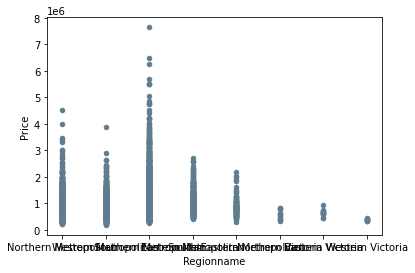

In [6]:
data.plot.scatter(x='Regionname',y='Price',color='#607c8e')

Text(0, 0.5, 'Count')

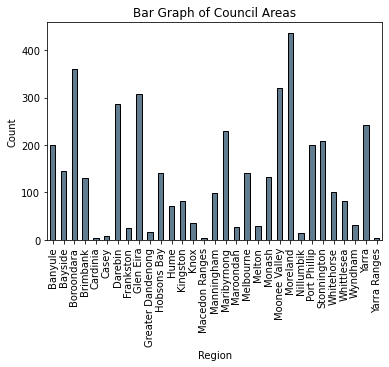

In [7]:
#data["Regionname"].plot.bar(color='#607c8e')


pl = data.groupby(['CouncilArea']).size()
pl.plot.bar(color='#607c8e',edgecolor="black")

plt.title('Bar Graph of Council Areas')
plt.xlabel('Region')
plt.ylabel('Count')

In [8]:
data = pd.get_dummies(data, columns=['CouncilArea'], prefix = ['Councilarea'])
data = pd.get_dummies(data, columns=['Regionname'], prefix = ['Regionname'])
print(data.shape)

(4116, 46)


In [9]:
scaler = preprocessing.StandardScaler()

data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
print(data.shape)
data.head()
# compression_opts = dict(method='zip',
#                         archive_name='out.csv')  
# data.to_csv('out.zip', index=False,
#           compression=compression_opts)  

(4116, 46)


,Price,Rooms,Bathroom,Distance,Propertycount,Landsize,BuildingArea,Councilarea_Banyule,Councilarea_Bayside,Councilarea_Boroondara,...,Councilarea_Yarra,Councilarea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,1035000.0,-1.032253,-0.803301,-1.315088,-0.777771,-0.326633,-0.436871,-0.226586,-0.191088,-0.309591,...,3.992276,-0.027007,-0.32718,-0.058421,1.492727,-0.056289,-0.172547,-0.722627,-0.519217,-0.051765
6,1876000.0,0.060252,0.653257,-1.315088,-0.777771,-0.234929,0.428419,-0.226586,-0.191088,-0.309591,...,3.992276,-0.027007,-0.32718,-0.058421,1.492727,-0.056289,-0.172547,-0.722627,-0.519217,-0.051765
7,1636000.0,-1.032253,-0.803301,-1.315088,-0.777771,-0.223595,-0.251924,-0.226586,-0.191088,-0.309591,...,3.992276,-0.027007,-0.32718,-0.058421,1.492727,-0.056289,-0.172547,-0.722627,-0.519217,-0.051765
9,1097000.0,-1.032253,-0.803301,-1.315088,-0.777771,-0.260689,-0.463292,-0.226586,-0.191088,-0.309591,...,3.992276,-0.027007,-0.32718,-0.058421,1.492727,-0.056289,-0.172547,-0.722627,-0.519217,-0.051765
12,750000.0,-1.032253,0.653257,-1.315088,-0.777771,-0.487373,-0.337792,-0.226586,-0.191088,-0.309591,...,3.992276,-0.027007,-0.32718,-0.058421,1.492727,-0.056289,-0.172547,-0.722627,-0.519217,-0.051765


Now we can run some Linear Models

In [10]:
y = data.iloc[:,0]
print(y.shape)
y.head()

X = data.iloc[:,1:]
print(X.shape)
X.head()

(4116,)
(4116, 45)


,Rooms,Bathroom,Distance,Propertycount,Landsize,BuildingArea,Councilarea_Banyule,Councilarea_Bayside,Councilarea_Boroondara,Councilarea_Brimbank,...,Councilarea_Yarra,Councilarea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,-1.032253,-0.803301,-1.315088,-0.777771,-0.326633,-0.436871,-0.226586,-0.191088,-0.309591,-0.18131,...,3.992276,-0.027007,-0.32718,-0.058421,1.492727,-0.056289,-0.172547,-0.722627,-0.519217,-0.051765
6,0.060252,0.653257,-1.315088,-0.777771,-0.234929,0.428419,-0.226586,-0.191088,-0.309591,-0.18131,...,3.992276,-0.027007,-0.32718,-0.058421,1.492727,-0.056289,-0.172547,-0.722627,-0.519217,-0.051765
7,-1.032253,-0.803301,-1.315088,-0.777771,-0.223595,-0.251924,-0.226586,-0.191088,-0.309591,-0.18131,...,3.992276,-0.027007,-0.32718,-0.058421,1.492727,-0.056289,-0.172547,-0.722627,-0.519217,-0.051765
9,-1.032253,-0.803301,-1.315088,-0.777771,-0.260689,-0.463292,-0.226586,-0.191088,-0.309591,-0.18131,...,3.992276,-0.027007,-0.32718,-0.058421,1.492727,-0.056289,-0.172547,-0.722627,-0.519217,-0.051765
12,-1.032253,0.653257,-1.315088,-0.777771,-0.487373,-0.337792,-0.226586,-0.191088,-0.309591,-0.18131,...,3.992276,-0.027007,-0.32718,-0.058421,1.492727,-0.056289,-0.172547,-0.722627,-0.519217,-0.051765


In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
...     X, y, test_size=0.2, random_state=30)

#Clear the old files
os.remove('X_train.csv')
os.remove('y_train.csv')
os.remove('X_test.csv')
os.remove('y_test.csv')

#Put the new files in
X_train.to_csv('X_train.csv', index=False)  
y_train.to_csv('y_train.csv', index=False)  
X_test.to_csv('X_test.csv', index=False) 
y_test.to_csv('y_test.csv', index=False)  


In [12]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

predictions_linear = regr.predict(X_test)
print("Basic Linear Regression:")
print('Root Mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_test, predictions_linear)))
print('Coefficient of determination: %.5f'
      % r2_score(y_test, predictions_linear))


alphas = np.array([1000,500,250,150,100,50,10,5,2,1,0.1,0.01,0.001,0.0001,0])


reg_ridge = linear_model.Ridge()

grid = model_selection.GridSearchCV(estimator=reg_ridge, param_grid=dict(alpha=alphas),scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)

print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

reg_ridge = linear_model.Ridge(alpha=10)
reg_ridge.fit(X_train, y_train)

predictions_ridge = reg_ridge.predict(X_test)

print("Ridge Regression:")
print('Root Mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_test, predictions_ridge)))
print('Coefficient of determination: %.5f'
      % r2_score(y_test, predictions_ridge))




Basic Linear Regression:
Root Mean squared error: 464128.22483
Coefficient of determination: 0.54009
GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.0e+03, 5.0e+02, 2.5e+02, 1.5e+02, 1.0e+02, 5.0e+01, 1.0e+01,
       5.0e+00, 2.0e+00, 1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04,
       0.0e+00])},
             scoring='neg_mean_squared_error')
-180885100403.65778
10.0
Ridge Regression:
Root Mean squared error: 463730.37000
Coefficient of determination: 0.54088


C:\Users\camer\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25402e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
